<a href="https://colab.research.google.com/github/karanaithal01/Forecast_1/blob/main/Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
#Import our libraries and datasets 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import random
import seaborn as sns 


In [1]:
from google.colab import files
uploaded = files.upload()

Saving Forecast_Data_Interview_1.csv to Forecast_Data_Interview_1.csv


In [4]:
import io
main_df = pd.read_csv(io.BytesIO(uploaded['Forecast_Data_Interview_1.csv']))

In [5]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     154 non-null    int64 
 1   Product   154 non-null    object
 2   Location  154 non-null    object
 3   Quantity  154 non-null    int64 
 4   Factor    154 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.1+ KB


In [6]:
main_df.tail()

,Month,Product,Location,Quantity,Factor
149,201906,P14,C4,12,0
150,201906,P2,C3,20,2
151,201906,P3,C5,19964,0
152,201906,P5,C4,28,0
153,201906,P7,C5,542,0


In [9]:
#Convert month format

main_df['Month'] = pd.to_datetime(main_df['Month'], format = "%Y%m")

In [10]:
#@title Exploratory Data Analysis
main_df.info()
main_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Month     154 non-null    datetime64[ns]
 1   Product   154 non-null    object        
 2   Location  154 non-null    object        
 3   Quantity  154 non-null    int64         
 4   Factor    154 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 6.1+ KB


,Month,Product,Location,Quantity,Factor
0,2018-01-01,P10,C1,5,1
1,2018-01-01,P10,C2,12,0
2,2018-01-01,P13,C1,266,1
3,2018-01-01,P13,C2,142,6
4,2018-01-01,P16,C3,12,4


In [11]:
#Sort our data according to Data

main_df = main_df.sort_values('Month')
main_df

,Month,Product,Location,Quantity,Factor
0,2018-01-01,P10,C1,5,1
1,2018-01-01,P10,C2,12,0
2,2018-01-01,P13,C1,266,1
3,2018-01-01,P13,C2,142,6
4,2018-01-01,P16,C3,12,4
...,...,...,...,...,...
148,2019-06-01,P13,C2,75,4
149,2019-06-01,P14,C4,12,0
150,2019-06-01,P2,C3,20,2
151,2019-06-01,P3,C5,19964,0


In [105]:
main_df.corr()

,Quantity,Factor,year
Quantity,1.000000,-0.168599,0.069772
Factor,-0.168599,1.000000,-0.028119
year,0.069772,-0.028119,1.000000


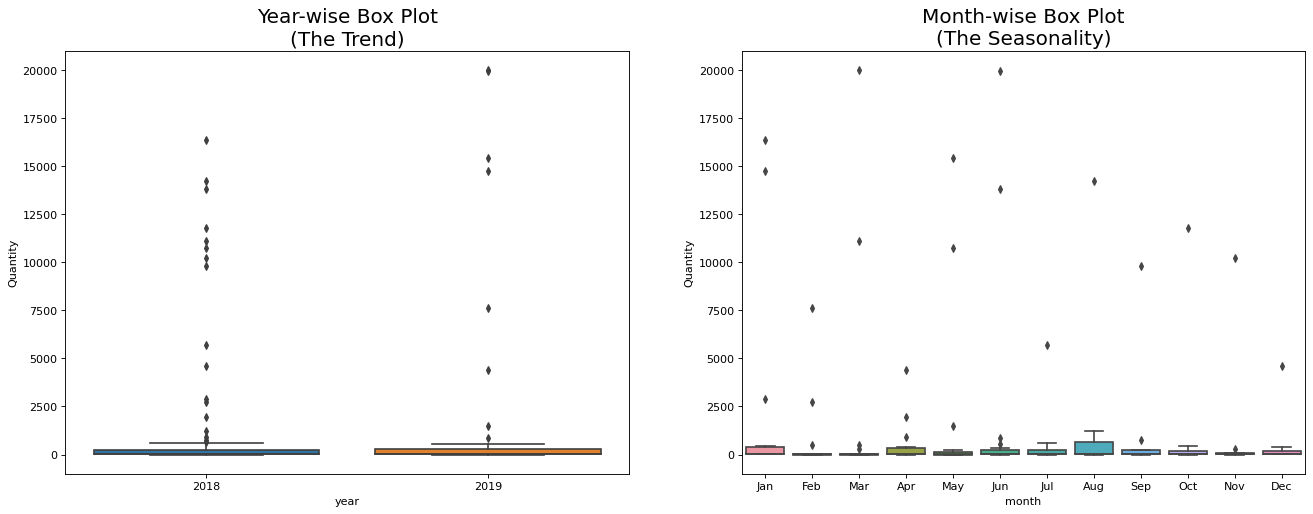

'\n# Draw Plot\nplt.figure(figsize=(16,12), dpi= 80)\nfor i, y in enumerate(years):\n    if i > 0:        \n        plt.plot(\'month\', \'value\', data=df.loc[df.year==y, :], color=mycolors[i], label=y)\n        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, \'value\'][-1:].values[0], y, fontsize=12, color=mycolors[i])\n\n# Decoration\nplt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel=\'$Drug Sales$\', xlabel=\'$Month$\')\nplt.yticks(fontsize=12, alpha=.7)\nplt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)\nplt.show()\n'

In [17]:
import matplotlib as mpl
# Prepare data
main_df['year'] = [d.year for d in main_df.Month]
main_df['month'] = [d.strftime('%b') for d in main_df.Month]
years = main_df['year'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='Quantity', data=main_df, ax=axes[0])
sns.boxplot(x='month', y='Quantity',data=main_df.loc[~main_df.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

main_df
"""
# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'value', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'value'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Drug Sales$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
plt.show()
"""

In [18]:
main_df

,Month,Product,Location,Quantity,Factor,year,month
0,2018-01-01,P10,C1,5,1,2018,Jan
1,2018-01-01,P10,C2,12,0,2018,Jan
2,2018-01-01,P13,C1,266,1,2018,Jan
3,2018-01-01,P13,C2,142,6,2018,Jan
4,2018-01-01,P16,C3,12,4,2018,Jan
...,...,...,...,...,...,...,...
148,2019-06-01,P13,C2,75,4,2019,Jun
149,2019-06-01,P14,C4,12,0,2019,Jun
150,2019-06-01,P2,C3,20,2,2019,Jun
151,2019-06-01,P3,C5,19964,0,2019,Jun


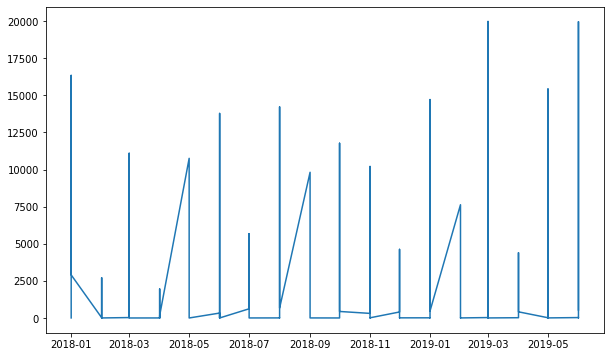

In [19]:
#Data Visualization
#plot distribution of Average Price and Date

plt.figure(figsize = (10, 6))
plt.plot(main_df['Month'],main_df['Quantity'])

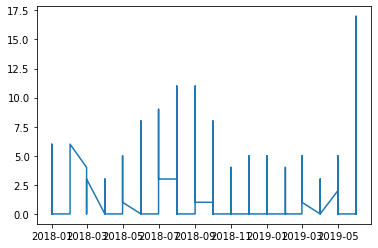

In [24]:
plt.plot(main_df['Month'],main_df['Factor'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


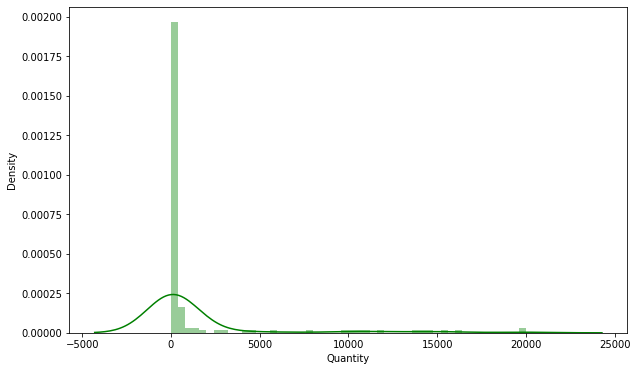

In [26]:
plt.figure(figsize=(10,6))
sns.distplot(main_df['Quantity'], color = 'g')

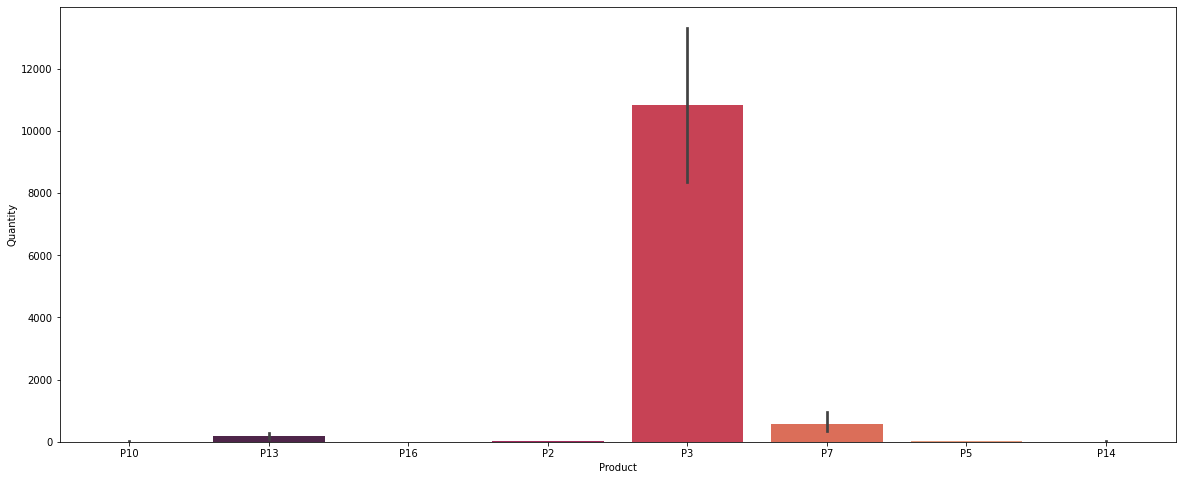

In [27]:
plt.figure(figsize=(20,8))
ax=sns.barplot(x='Product',y='Quantity',data = main_df, palette='rocket')

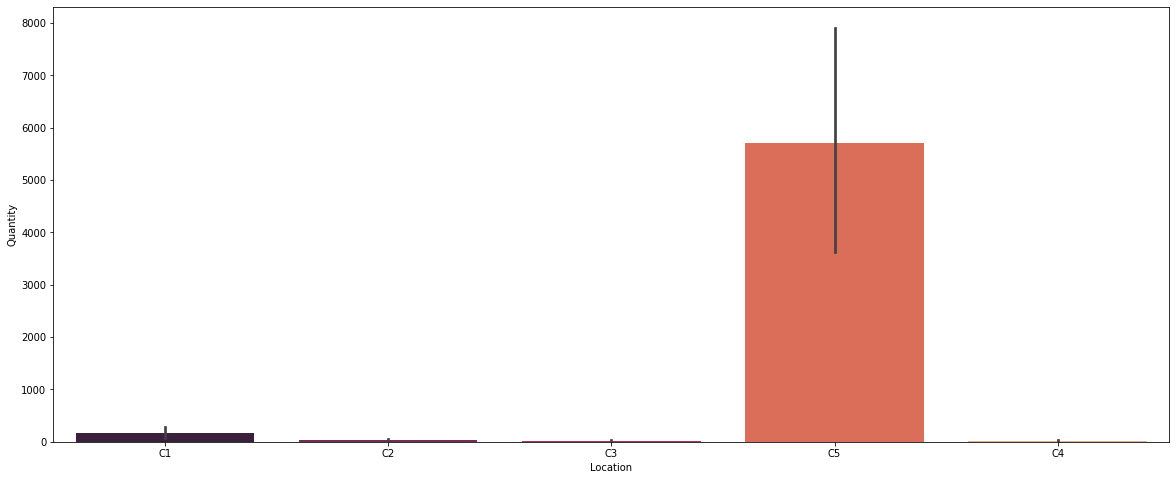

In [28]:
plt.figure(figsize=(20,8))
ax=sns.barplot(x='Location',y='Quantity',data = main_df, palette='rocket')

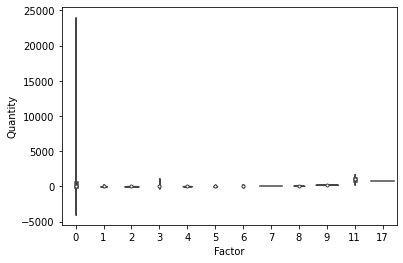

In [30]:
sns.violinplot(y='Quantity', x='Factor',data = main_df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

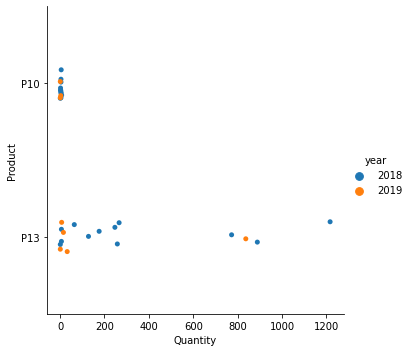

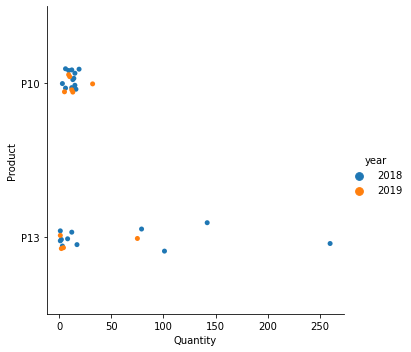

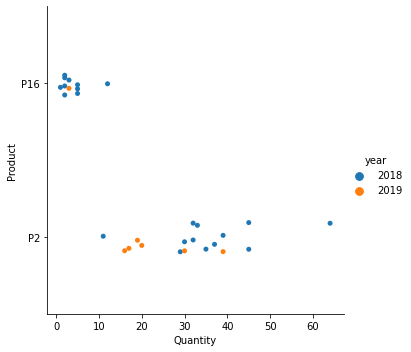

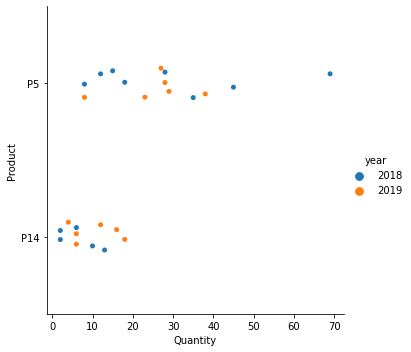

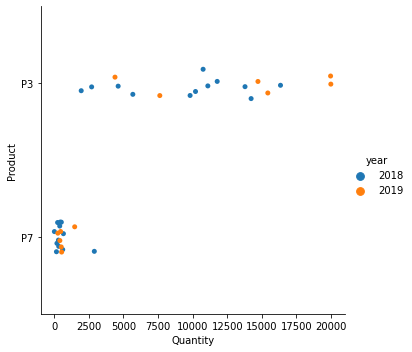

In [32]:
c1 = sns.catplot('Quantity','Product',data = main_df[main_df['Location']== 'C1'],hue = 'year',height = 5)
c2 = sns.catplot('Quantity','Product',data = main_df[main_df['Location']== 'C2'],hue = 'year',height = 5)
c3 = sns.catplot('Quantity','Product',data = main_df[main_df['Location']== 'C3'],hue = 'year',height = 5)
c4 = sns.catplot('Quantity','Product',data = main_df[main_df['Location']== 'C4'],hue = 'year',height = 5)
c5 = sns.catplot('Quantity','Product',data = main_df[main_df['Location']== 'C5'],hue = 'year',height = 5)

We can split the product according to specific location and check for the trend. 

Overall analysis shows Product P3 in location C5 to be most successful 

In [36]:
from prophet import Prophet

In [39]:
prophet1_df =main_df[['Month', 'Quantity']]
prophet1_df

,Month,Quantity
0,2018-01-01,5
1,2018-01-01,12
2,2018-01-01,266
3,2018-01-01,142
4,2018-01-01,12
...,...,...
148,2019-06-01,75
149,2019-06-01,12
150,2019-06-01,20
151,2019-06-01,19964


In [42]:
prophet1_df.rename(columns={'Month':'ds','Quantity' : 'y'},inplace='true')
m = Prophet()
m.fit(prophet1_df)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp42zf19nn/dkddofr8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp42zf19nn/h1cd6hod.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26887', 'data', 'file=/tmp/tmp42zf19nn/dkddofr8.json', 'i

In [57]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

In [58]:
#outcome 
#trend generation
forecast


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,760.852616,-4106.823039,5588.799239,760.852616,760.852616,0.0,0.0,0.0,0.0,0.0,0.0,760.852616
1,2018-02-01,834.375849,-4059.468327,5776.132310,834.375849,834.375849,0.0,0.0,0.0,0.0,0.0,0.0,834.375849
2,2018-03-01,900.783950,-4049.371865,5718.071078,900.783950,900.783950,0.0,0.0,0.0,0.0,0.0,0.0,900.783950
3,2018-04-01,974.269344,-3947.691482,5752.005754,974.269344,974.269344,0.0,0.0,0.0,0.0,0.0,0.0,974.269344
4,2018-05-01,1045.384229,-3874.557034,6001.464014,1045.384229,1045.384229,0.0,0.0,0.0,0.0,0.0,0.0,1045.384229
...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,2020-05-27,2839.848796,-2115.317345,7588.214024,2839.673563,2840.025257,0.0,0.0,0.0,0.0,0.0,0.0,2839.848796
379,2020-05-28,2842.219291,-1986.386656,7770.850308,2842.043255,2842.396265,0.0,0.0,0.0,0.0,0.0,0.0,2842.219291
380,2020-05-29,2844.589785,-2372.660712,7467.716997,2844.412658,2844.767594,0.0,0.0,0.0,0.0,0.0,0.0,2844.589785
381,2020-05-30,2846.960280,-1946.378044,7638.333524,2846.782081,2847.139176,0.0,0.0,0.0,0.0,0.0,0.0,2846.960280


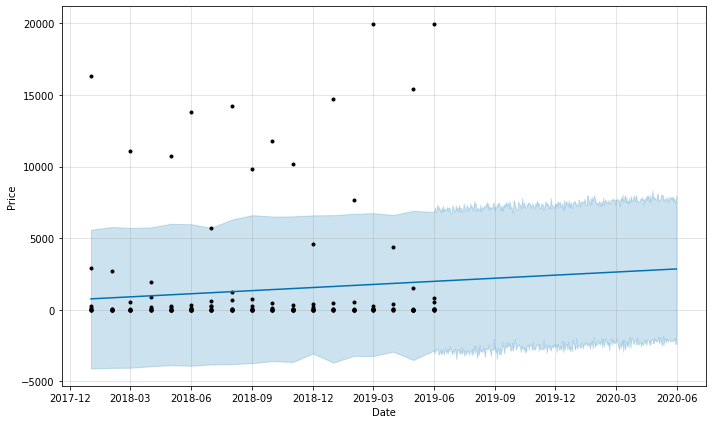

In [59]:
figure = m.plot(forecast, xlabel='Date', ylabel='Price')

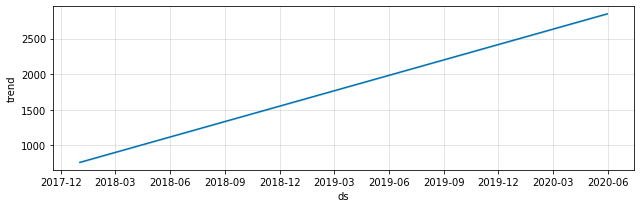

In [60]:
#performance during year and month

figure2 = m.plot_components(forecast)

In [75]:
#Locaion Specific
df0 = main_df[(main_df['Location'] == 'C1')]
df0 = main_df[(main_df['Product'] == 'P10')]

df1 = main_df[(main_df['Location'] == 'C1') & main_df['Product'] == 'P10']
df2 = main_df[(main_df['Location'] == 'C1') & main_df['Product'] == 'P13']





,Month,Product,Location,Quantity,Factor,year,month


In [77]:
df0 = main_df[(main_df['Location'] == 'C1')]
df0_1 = df0[(df0['Product'] == 'P10')]

df0_1

,Month,Product,Location,Quantity,Factor,year,month
0,2018-01-01,P10,C1,5,1,2018,Jan
8,2018-02-01,P10,C1,7,0,2018,Feb
16,2018-03-01,P10,C1,4,1,2018,Mar
24,2018-04-01,P10,C1,3,0,2018,Apr
32,2018-05-01,P10,C1,1,1,2018,May
41,2018-06-01,P10,C1,2,0,2018,Jun
51,2018-07-01,P10,C1,4,0,2018,Jul
60,2018-08-01,P10,C1,4,1,2018,Aug
69,2018-09-01,P10,C1,4,1,2018,Sep
78,2018-10-01,P10,C1,2,1,2018,Oct


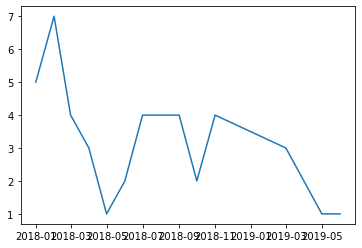

In [78]:
plt.plot(df0_1['Month'],df0_1['Quantity'])

In [82]:
df0_1 = df0_1.rename(columns={'Month':'ds','Quantity':'y'})

In [83]:
m1 = Prophet()
m1.fit (df0_1)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp42zf19nn/u6d0xn5n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp42zf19nn/r01atl5i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76593', 'data', 'file=/tmp/tmp42zf19nn/u6d0xn5n.json', 'init=/tmp/tmp42zf19nn/r01atl5i.json', 'output', 'file=/tmp/tmp42zf19nn/prophet_model_hcm7vvl/prophet_model-20221031031610.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
03:16:10 - cmdstanpy - INFO - Chain [1] start processing
IN

In [84]:
future = m1.make_future_dataframe(periods = 365)
forecast1 = m1.predict(future)

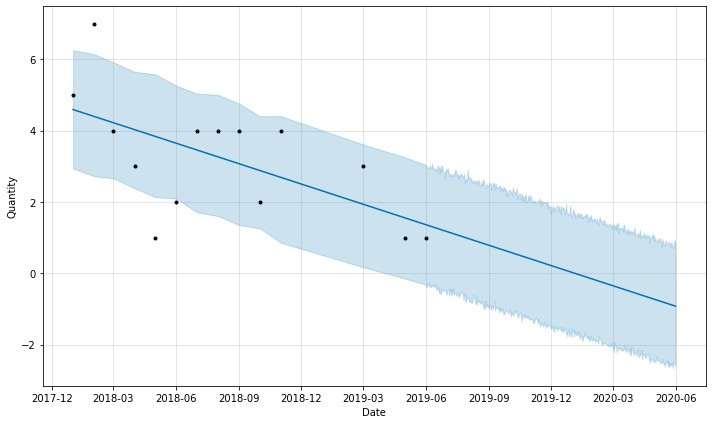

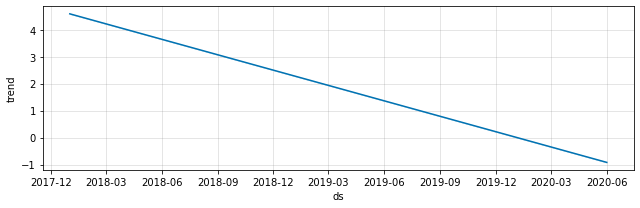

In [85]:
figure3 = m1.plot(forecast1, xlabel = 'Date' , ylabel = 'Quantity')
figure4 = m1.plot_components(forecast1)

In [86]:
df0_2 = df0[(df0['Product'] == 'P13')]

df0_2

,Month,Product,Location,Quantity,Factor,year,month
2,2018-01-01,P13,C1,266,1,2018,Jan
10,2018-02-01,P13,C1,6,1,2018,Feb
18,2018-03-01,P13,C1,1,1,2018,Mar
26,2018-04-01,P13,C1,889,3,2018,Apr
34,2018-05-01,P13,C1,258,0,2018,May
43,2018-06-01,P13,C1,6,7,2018,Jun
53,2018-07-01,P13,C1,247,9,2018,Jul
62,2018-08-01,P13,C1,1217,11,2018,Aug
71,2018-09-01,P13,C1,773,11,2018,Sep
80,2018-10-01,P13,C1,128,8,2018,Oct


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 12.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp42zf19nn/x90xf1in.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp42zf19nn/qtfityqy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1736', 'data', 'file=/tmp/tmp42zf19nn/x90xf1in.json', 'init=/tmp/tmp42zf19nn/qtfityqy.json', 'output', 'file=/tmp/tmp42zf19nn/prophet_modelu1xp4hsw/prophet_model-20221031032011.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
03:20:11 - cmdstanpy - INFO - Chain [1] start processing
INF

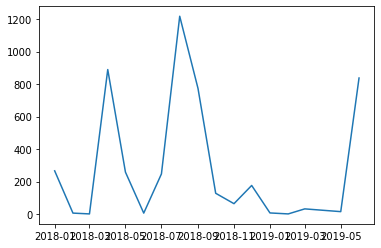

In [90]:
plt.plot(df0_2['ds'],df0_2['y'])
df0_2 = df0_2.rename(columns={'Month':'ds','Quantity':'y'})
m2 = Prophet()
m2.fit (df0_2)

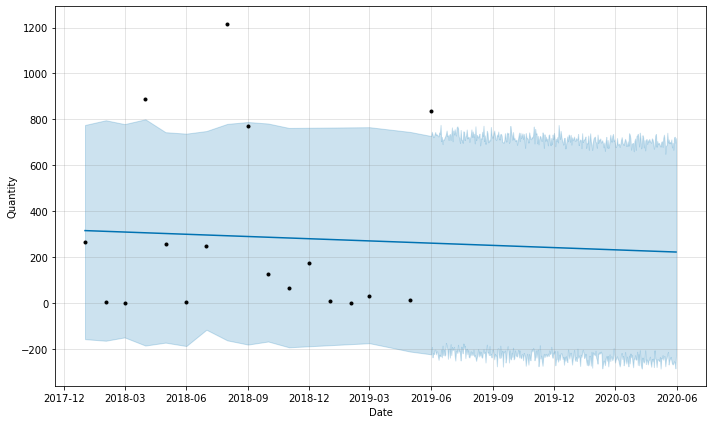

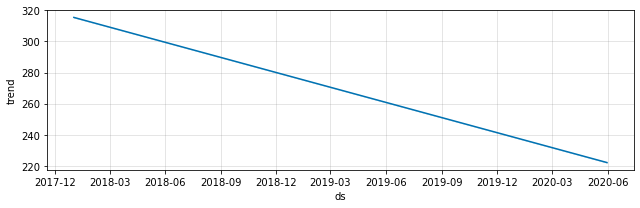

In [102]:
future2 = m2.make_future_dataframe(periods = 365)
forecast2 = m2.predict(future)
figure4 = m2.plot(forecast2, xlabel = 'Date' , ylabel = 'Quantity')
figure5 = m2.plot_components(forecast2)

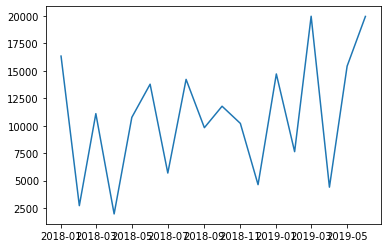

In [94]:
#Product P3 Location C5

df1 = main_df[(main_df['Location'] == 'C5')]
df1_1 = df1[(df1['Product'] == 'P3')]

df1_1
plt.plot(df1_1['Month'],df1_1['Quantity'])


In [100]:
df1_1 = df1_1.rename(columns={'Month':'ds','Quantity':'y'})
m3 = Prophet()
m3.fit (df1_1)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp42zf19nn/ti4nwz96.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp42zf19nn/yomwqnm6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68077', 'data', 'file=/tmp/tmp42zf19nn/ti4nwz96.json', 'init=/tmp/tmp42zf19nn/yomwqnm6.json', 'output', 'file=/tmp/tmp42zf19nn/prophet_modeljgp9e3d7/prophet_model-20221031032550.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
03:25:50 - cmdstanpy - INFO - Chain [1] start processing
IN

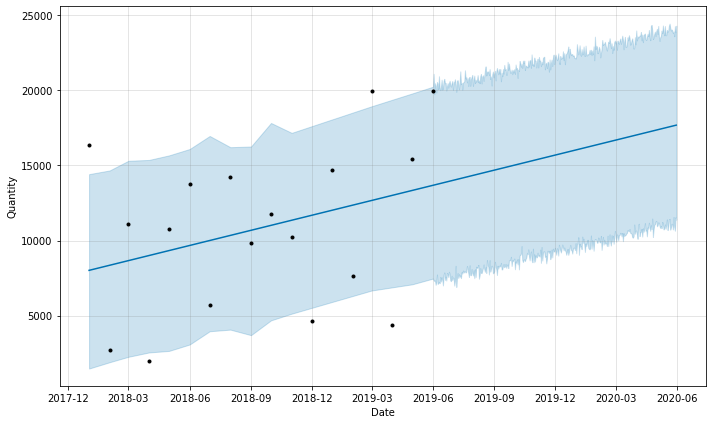

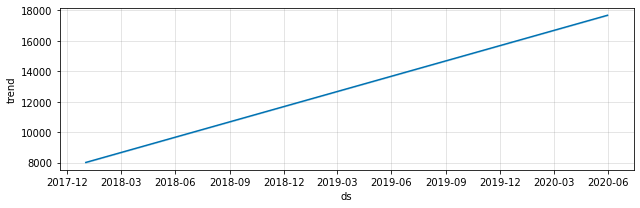

In [101]:
future3 = m3.make_future_dataframe(periods = 365)
forecast3 = m3.predict(future)
figure6 = m3.plot(forecast3, xlabel = 'Date' , ylabel = 'Quantity')
figure7 = m3.plot_components(forecast3)

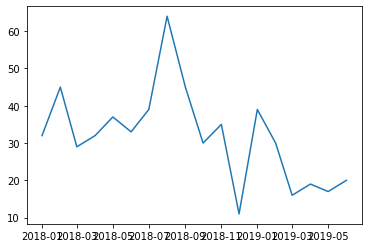

In [103]:
#Product P2 Lcation c3

df2 = main_df[(main_df['Location'] == 'C3')]
df2 = df2[(df2['Product'] == 'P2')]

df2
plt.plot(df2['Month'],df2['Quantity'])

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp42zf19nn/o3ga1p8e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp42zf19nn/su54kify.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83365', 'data', 'file=/tmp/tmp42zf19nn/o3ga1p8e.json', 'init=/tmp/tmp42zf19nn/su54kify.json', 'output', 'file=/tmp/tmp42zf19nn/prophet_model9eo_o2x_/prophet_model-20221031033232.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
03:32:32 - cmdstanpy - INFO - Chain [1] start processing
IN

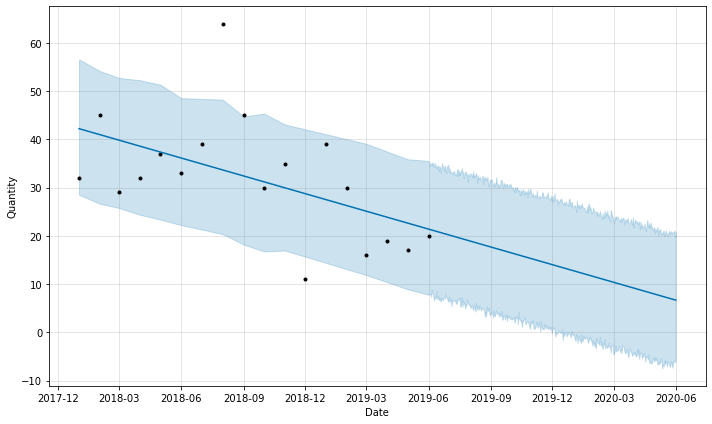

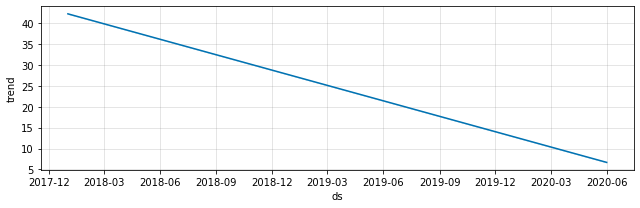

In [104]:
df2 = df2.rename(columns={'Month':'ds','Quantity':'y'})
m4 = Prophet()
m4.fit (df2)


future4 = m4.make_future_dataframe(periods = 365)
forecast4 = m4.predict(future)
figure8 = m4.plot(forecast4, xlabel = 'Date' , ylabel = 'Quantity')
figure9 = m4.plot_components(forecast4)